In [1]:
import numpy as np
import tensorflow as tf
import os
from shutil import rmtree
from yoloGenerator.config import *
from pascalVOC.pascalVOC2yolov3 import *

In [41]:
print('Loading training dataset:')
trainset = tf.data.Dataset.list_files(os.path.join(MAIN_PATH, DATASET_DIR, TRAIN_DIR)+'/*.xml')
trainset = trainset.map(lambda x: tf.py_function(pascal_voc_to_dict,inp=[x],Tout=[tf.float32, tf.float32, tf.float32]))
trainset = trainset.batch(10)#.shuffle(50).prefetch(20)
print('    Done!')

Loading training dataset:
    Done!


In [3]:
print('Loading test dataset:')
testset = tf.data.Dataset.list_files(os.path.join(MAIN_PATH, DATASET_DIR, TEST_DIR)+'/*.xml')
testset = testset.map(lambda x: tf.py_function(pascal_voc_to_dict,inp=[x],Tout=[tf.float32, tf.float32, tf.float32]))
testset = testset.batch(TRAIN_BATCH).prefetch(TRAIN_PREFETCH)
print('    Done!')

Loading test dataset:
    Done!


In [50]:
# def show_results(model, images_tensor, images_out, grid, bnb, classes, threshold=0.5):
def image_examples(dataset, batch, no_images):
    data = dataset.as_numpy_iterator().next()
    images = data[0][:no_images, ...]
    tensor0 = data[1][:no_images, ...]
    tensor1 = data[2][:no_images, ...]
    print('data taken correctly!')
    for img in range(no_images):
        image = images[img, ...]
        image = tf.cast(image*255,dtype=tf.uint8).numpy()
        tensor0_img = tensor0[img, ...]
        tensor1_img = tensor1[img, ...]
        image_position = list()
        ten0 =  tf.reduce_sum(tensor0_img, axis=2)
        ten1 =  tf.reduce_sum(tensor1_img, axis=2)
        for row in range(tensor0_img.shape[0]):
            for col in range(tensor0_img.shape[0]):
                if ten0[row,col,4] == 1:
                    v = np.zeros(ten0[row,col,:].shape)
                    v[0] = col
                    v[1] = row
                    v = ten0[row,col,:].numpy()+v
                    v[0] = v[0]/float(tensor0_img.shape[0])
                    v[1] = v[1]/float(tensor0_img.shape[1])
                    image_position.append(v)
        for row in range(tensor1_img.shape[0]):
            for col in range(tensor1_img.shape[0]):
                if ten1[row,col,4] == 1:
                    v = np.zeros(ten1[row,col,:].shape)
                    v[0] = col
                    v[1] = row
                    v = ten1[row,col,:].numpy()+v
                    v[0] = v[0]/float(tensor1_img.shape[0])
                    v[1] = v[1]/float(tensor1_img.shape[1])
                    image_position.append(v)
        image = cv.cvtColor(image, cv.COLOR_GRAY2RGB)
        for rect in image_position:
            x_min = rect[0] - rect[2]/2
            x_max = rect[0] + rect[2]/2
            y_min = rect[1] - rect[3]/2
            y_max = rect[1] + rect[3]/2
            image = cv.rectangle(image, (int(416*x_min), int(416*y_min)),
                                 (int(416*x_max), int(416*y_max)), (255, 0, 0), 2)
        plt.imshow(image)
        plt.show()


0 26 0.29927884615384615 0.7548076923076923
1 13 0.29927884615384615 0.7548076923076923
0 26 0.4362980769230769 0.07091346153846154
1 13 0.4362980769230769 0.07091346153846154
0 26 0.1622596153846154 0.4723557692307692
1 13 0.1622596153846154 0.4723557692307692
0 26 0.6766826923076923 0.6298076923076923
1 13 0.6766826923076923 0.6298076923076923
0 26 0.8509615384615384 0.7872596153846154
1 13 0.8509615384615384 0.7872596153846154
0 26 0.38221153846153844 0.3605769230769231
1 13 0.38221153846153844 0.3605769230769231
0 26 0.4074519230769231 0.41586538461538464
1 13 0.4074519230769231 0.41586538461538464
0 26 0.5012019230769231 0.5757211538461539
1 13 0.5012019230769231 0.5757211538461539
0 26 0.6526442307692307 0.17307692307692307
1 13 0.6526442307692307 0.17307692307692307
0 26 0.49158653846153844 0.6935096153846154
1 13 0.49158653846153844 0.6935096153846154
0 26 0.6189903846153846 0.5192307692307693
1 13 0.6189903846153846 0.5192307692307693
0 26 0.12139423076923077 0.138221153846153

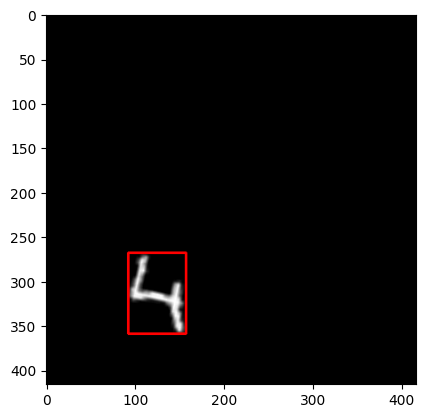

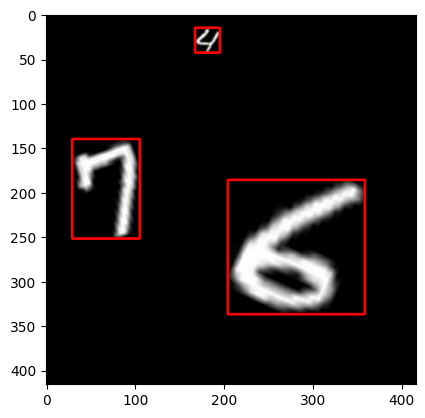

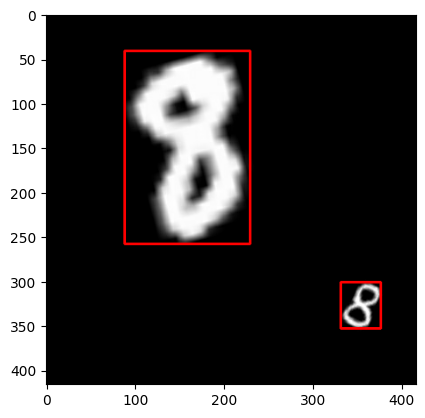

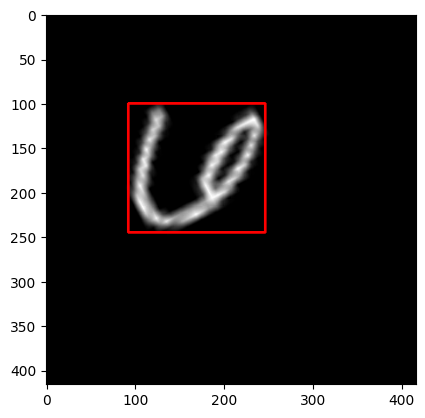

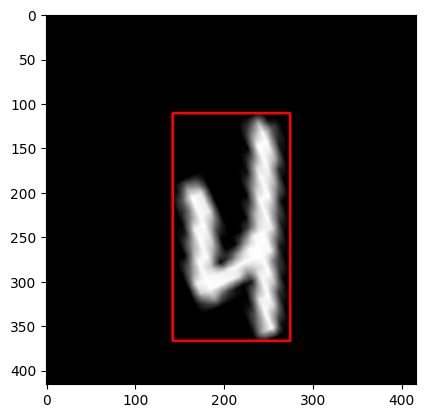

In [51]:
image_examples(trainset, 10, 5)